In [14]:
import pandas as pd
import numpy as np

Right now I am dropping the geography part later we will include it usinng one hot encoding

In [22]:
df = pd.read_csv("train.csv")
df.shape
df.sample(3)
class_drop = ['id','Surname','Geography','CustomerId']
df.sample(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
11378,11378,15714241,Y?,675,France,Male,42.0,1,0.00,2,1.0,1.0,167984.72,0
1892,1892,15662488,Ch'iu,721,France,Female,57.0,9,123086.39,1,0.0,0.0,66979.58,0
5544,5544,15754084,Shaffer,735,Germany,Female,39.0,0,145988.65,2,1.0,1.0,140166.95,0


In [23]:
for i in range(len(class_drop)):
  df.drop(class_drop[i],axis='columns',inplace=True)

In [26]:
df.sample(3)
df.shape[1]

10

Check how these Gender bias can be removed

In [29]:
df.sample(3)
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df.Balance.unique()
df.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2093,732,1,49.0,8,122388.38,2,1.0,0.0,30020.09,0
7547,744,0,39.0,5,0.00,2,0.0,1.0,114957.13,0
6550,758,1,33.0,4,0.00,1,0.0,0.0,96097.65,0


In [30]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [93]:
x = df.drop('Exited',axis='columns')
y = df['Exited']
x.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2410,543,0,40.0,1,127631.62,2,1.0,1.0,102515.42
5461,562,0,44.0,10,122314.50,2,0.0,1.0,68574.88
6467,619,1,29.0,9,123711.73,1,1.0,1.0,105715.01


In [63]:
class_rem = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

for i in range(len(class_rem)):
  x[class_rem[i]] = scaler.fit_transform(np.array(x[class_rem[i]]).reshape(-1,1))
x.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
10677,0.845214,1,0.546875,0.7,0.453209,0.000000,0.0,1.0,0.769455
2118,0.627291,0,0.296875,0.4,0.000000,0.333333,1.0,1.0,0.619254
10273,0.488798,1,0.250000,0.9,0.000000,0.333333,1.0,0.0,0.514896


In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [76]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(x.shape[1],),activation='sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
564/564 [==============================] - 1s 2ms/step - loss: 0.7397 - accuracy: 0.5010
Epoch 2/50
564/564 [==============================] - 1s 2ms/step - loss: 0.6617 - accuracy: 0.6426
Epoch 3/50
564/564 [==============================] - 1s 2ms/step - loss: 0.6276 - accuracy: 0.6769
Epoch 4/50
564/564 [==============================] - 1s 3ms/step - loss: 0.6070 - accuracy: 0.6850
Epoch 5/50
564/564 [==============================] - 1s 2ms/step - loss: 0.5934 - accuracy: 0.6906
Epoch 6/50
564/564 [==============================] - 1s 2ms/step - loss: 0.5838 - accuracy: 0.6961
Epoch 7/50
564/564 [==============================] - 1s 2ms/step - loss: 0.5764 - accuracy: 0.7014
Epoch 8/50
564/564 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 0.7064
Epoch 9/50
564/564 [==============================] - 1s 2ms/step - loss: 0.5653 - accuracy: 0.7102
Epoch 10/50
564/564 [==============================] - 1s 2ms/step - loss: 0.5608 - accuracy: 0.7140

In [78]:
model.evaluate(x_test,y_test)

141/141 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7455


[0.531112015247345, 0.7454545497894287]

In [67]:
predict = model.predict(x_test)
y_pred = []
for i in predict:
  if i< 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

89/89 [==============================] - 0s 1ms/step


In [68]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2228
           1       0.71      0.28      0.40       617

    accuracy                           0.82      2845
   macro avg       0.77      0.62      0.65      2845
weighted avg       0.80      0.82      0.79      2845



Text(70.72222222222221, 0.5, 'Truths')

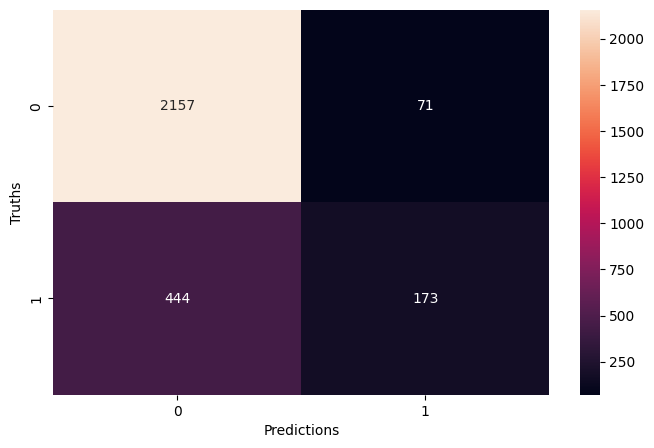

In [69]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(8,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truths')

As we can see there is imbalanced in dataset
We will produce new data points using SMOTE which backhood uses knn algorithm to produce new data points

In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)

In [73]:
y_sm = np.array(y_sm)
final = np.unique(y_sm,return_counts=True)
x_sm = np.array(x_sm)

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [117]:
model = keras.Sequential([
    keras.layers.Dense(4,input_shape=(x.shape[1],),activation='sigmoid'),
    keras.layers.Dense(2,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
356/356 [==============================] - 5s 6ms/step - loss: 0.5389 - accuracy: 0.7896
Epoch 2/50
356/356 [==============================] - 2s 6ms/step - loss: 0.5107 - accuracy: 0.7896
Epoch 3/50
356/356 [==============================] - 1s 4ms/step - loss: 0.5017 - accuracy: 0.7896
Epoch 4/50
356/356 [==============================] - 2s 6ms/step - loss: 0.4904 - accuracy: 0.7896
Epoch 5/50
356/356 [==============================] - 1s 3ms/step - loss: 0.4777 - accuracy: 0.7896
Epoch 6/50
356/356 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.7896
Epoch 7/50
356/356 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.7896
Epoch 8/50
356/356 [==============================] - 1s 2ms/step - loss: 0.4481 - accuracy: 0.7896
Epoch 9/50
356/356 [==============================] - 1s 2ms/step - loss: 0.4421 - accuracy: 0.7912
Epoch 10/50
356/356 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.7957

In [118]:
model.evaluate(x_test,y_test)

89/89 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8415


[0.3820497989654541, 0.8414762616157532]

In [119]:
pred = model.predict(x_test)
y_pred = []
for i in pred:
  if i<0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)


89/89 [==============================] - 0s 2ms/step


In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2290
           1       0.68      0.35      0.47       555

    accuracy                           0.84      2845
   macro avg       0.77      0.66      0.69      2845
weighted avg       0.82      0.84      0.82      2845



Text(70.72222222222221, 0.5, 'Truths')

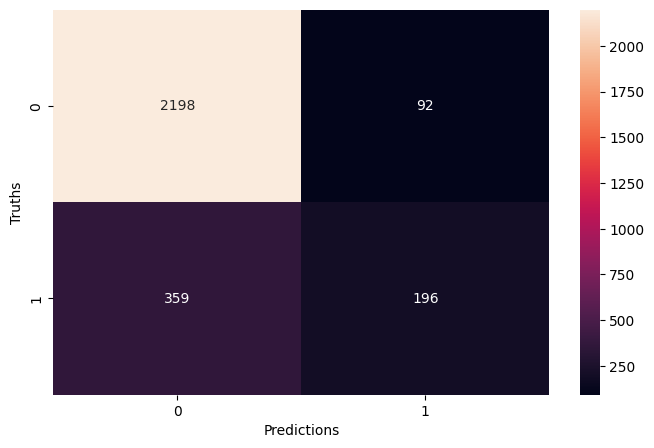

In [121]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(8,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truths')

Now using Ensemble learning with imblearn


In [86]:
!pip install scikeras
from imblearn.ensemble import BalancedBaggingClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [94]:
x = df.drop('Exited',axis='columns')
y = df['Exited']

In [95]:
class_rem = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

for i in range(len(class_rem)):
  x[class_rem[i]] = scaler.fit_transform(np.array(x[class_rem[i]]).reshape(-1,1))
x.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9181,0.716904,1,0.375000,0.7,0.0,0.333333,1.0,0.0,0.359290
4501,0.562118,0,0.390625,0.7,0.0,0.000000,1.0,0.0,0.397495
3340,0.468432,0,0.234375,0.7,0.0,0.333333,1.0,1.0,0.552963


In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [111]:
def create_model():
  model = keras.Sequential([
    keras.layers.Dense(4,input_shape=(x.shape[1],),activation='sigmoid'),
    keras.layers.Dense(2,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
  ])
  model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
  )
  return model

In [112]:
keras_classifier = KerasClassifier(build_fn=create_model, epochs=50, batch_size=0, verbose=0)

In [113]:
balanced_bagging = BalancedBaggingClassifier(base_estimator=keras_classifier,
                                             n_estimators=5,
                                             sampling_strategy='auto',
                                             replacement=False,
                                             random_state=42)

In [114]:
balanced_bagging.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`

BalancedBaggingClassifier(base_estimator=KerasClassifier(batch_size=0, build_fn=<function create_model at 0x7ad67ce00c10>, epochs=50, verbose=0),
                          n_estimators=5, random_state=42)

In [115]:
accuracy = balanced_bagging.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7557117750439367
